In [ ]:
from google.colab import drive

# 1. Google Drive ÎßàÏö¥Ìä∏
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï (ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï Í≤ΩÎ°ú)
data_root = '/content/drive/MyDrive/Colab Notebooks/datathon/Ï£ºÎ†•_ÎπÑÏ£ºÎ†•ÏÉÅÌíà Îç∞Ïù¥ÌÑ∞/Ï£ºÎ†•ÏÉÅÌíà'
# file_path = f'{data_root}/2019-Nov.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import os

In [ ]:
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# Ìè∞Ìä∏ ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# Ìè∞Ìä∏ Îì±Î°ù Î∞è matplotlib ÏÑ§Ï†ï
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
top_one_df = pd.read_parquet(f'{data_root}/one_time_buyers_all_events.parquet')

In [ ]:
# top_one_df.head()

In [ ]:
# category_lvl1 Ïª¨Îüº Í≤∞Ï∏°Ïπò ÌôïÏù∏
missing_category_lvl1 = top_one_df['category_lvl1'].isnull().sum()
print(f"Number of missing values in category_lvl1: {missing_category_lvl1}")

Number of missing values in category_lvl1: 0


#1. Í∏∞Î≥∏ EDA + ÌçºÎÑê Î∂ÑÏÑù
4Í∞ú Í∑∏Î£π ÌñâÎèô ÌäπÏÑ± Ï∞®Ïù¥ ÌååÏïÖ
- Í≥†Í∞ùÎ≥Ñ Ïù¥Î≤§Ìä∏ ÌùêÎ¶Ñ Î∂ÑÏÑù (view ‚Üí cart ‚Üí purchase ÌçºÎÑê)
- Í≥†Í∞ùÎãπ Ïù¥Î≤§Ìä∏ Ïàò, ÌèâÍ∑† ÏÑ∏ÏÖò Ïàò, ÌèâÍ∑† Î®∏Î¨∏ ÏãúÍ∞Ñ Îì± ÌÜµÍ≥Ñ
- Ïπ¥ÌÖåÍ≥†Î¶¨, Î∏åÎûúÎìú, ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌñâÎèô Î∂ÑÌè¨

In [ ]:
# ÌçºÎÑê Î∂ÑÏÑù (view-cart-purchase Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®)
# ÏÇ¨Ïö©ÏûêÎ≥Ñ event_type ÏßëÍ≥Ñ
funnel_counts = top_one_df.groupby('event_type')['user_id'].nunique().reindex(['view', 'cart', 'purchase'])

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ (ÏàúÏ∞®Ï†Å Ï†ÑÌôò Í∏∞Ï§Ä)
view_to_cart = funnel_counts['cart'] / funnel_counts['view'] if funnel_counts['view'] else 0
cart_to_purchase = funnel_counts['purchase'] / funnel_counts['cart'] if funnel_counts['cart'] else 0
view_to_purchase = funnel_counts['purchase'] / funnel_counts['view'] if funnel_counts['view'] else 0

print(funnel_counts)
print(f"view_to_cart: {view_to_cart}")
print(f"cart_to_purchase: {cart_to_purchase}")
print(f"view_to_purchase: {view_to_purchase}")

event_type
view        687495
cart        638191
purchase    690159
Name: user_id, dtype: int64
view_to_cart: 0.9282845693423225
cart_to_purchase: 1.0814301674577047
view_to_purchase: 1.003874937272271


- view ‚Üí cart Ï†ÑÌôòÏú®Ïù¥ Îß§Ïö∞ ÎÜíÎã§ (92.8%)
- cart ‚Üí purchase Ï†ÑÌôòÏú®Ïù¥ 100%Î•º ÎÑòÍπÄ ‚Üí Í∞Å Îã®Í≥ÑÎ≥Ñ ÏßëÍ≥ÑÍ∞Ä user_id Í∏∞Ï§Ä unique countÏù¥ÎØÄÎ°ú, ÏùºÎ∂Ä Ïú†Ï†ÄÍ∞Ä view ÏóÜÏù¥ cartÎÇò purchaseÎ°ú ÏßÅÏ†ë ÏßÑÏûÖÌïú Í≤ΩÏö∞ Ï°¥Ïû¨(ex. Ï¶êÍ≤®Ï∞æÍ∏∞, Ïô∏Î∂Ä Ïú†ÏûÖ, Ïû•Î∞îÍµ¨Îãà Î∞îÎ°úÍ∞ÄÍ∏∞ Îì±)
- Í≤∞Î°†Ï†ÅÏúºÎ°ú, Ïù¥ ÏßëÎã®ÏùÄ 1ÌöåÎßå Íµ¨Îß§ÌñàÏßÄÎßå Íµ¨Îß§ÍπåÏßÄ Í∞ÄÎäî ÌçºÎÑê Ïù¥ÌÉàÎ•†ÏùÄ Í±∞Ïùò ÏóÜÏùå
- Ï≤´ Íµ¨Îß§ Ïù¥ÌõÑ Ïù¥ÌÉà ÏõêÏù∏Ïóê ÎåÄÌïú ÌÉêÏÉâÏù¥ Ï§ëÏöî, Íµ¨Îß§ Í≤ΩÌóòÏùÄ ÎßåÏ°±ÌñàÎäîÏßÄ, Ïù¥ÌõÑ Î¶¨ÎßàÏù∏Îìú Ïú†ÏûÖÏù¥ Î∂ÄÏ°±ÌñàÎäîÏßÄ Îì± ÌñâÎèô Ïù¥Î†• Ï§ëÏã¨ Î∂ÑÏÑù ÌïÑÏöî, Î∏åÎûúÎìú/Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Ï≤´ Íµ¨Îß§ Î∂ÑÏÑù ‚Üí Î∞òÎ≥µ Ïú†ÎèÑÍ∞Ä Ïâ¨Ïö¥ ÏÉÅÌíàÍµ∞Ïù∏ÏßÄ ÌôïÏù∏

#Ïû¨Íµ¨Îß§ Í≥†Í∞ùÍ≥º ÎπÑÍµê ÏúÑÌïú ÌñâÎèô ÌùêÎ¶Ñ Î∂ÑÏÑù
| Ìï≠Î™©            | ÏÑ§Î™Ö                                  |
| ------------- | ----------------------------------- |
| ÌèâÍ∑† ÏÑ∏ÏÖò Ïàò       | Ïú†Ï†ÄÎãπ ÌÉêÏÉâÎüâ                             |
| ÌèâÍ∑† Ïù¥Î≤§Ìä∏ Ïàò      | Ïú†Ï†ÄÎãπ ÌñâÎèôÎüâ                             |
| ÌèâÍ∑† ÌÉêÏÉâ Ïπ¥ÌÖåÍ≥†Î¶¨ Ïàò  | ÏáºÌïë Îã§ÏñëÏÑ± ÏßÄÌëú                           |
| ÌèâÍ∑† Î∏åÎûúÎìú Ïàò      | ÌÉêÏÉâ Î∏åÎûúÎìú Ìè≠                            |
| ÏöîÏùº/ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Î∂ÑÌè¨ | Íµ¨Îß§ ÏßëÏ§ë ÌÉÄÏù¥Î∞ç ÌååÏïÖ                        |
| Íµ¨Îß§ Ï†Ñ ÌñâÎèô ÏãúÌÄÄÏä§   | `view ‚Üí cart ‚Üí purchase` ÎπÑÏú® ÏñºÎßàÎÇò ÎêòÎäîÏßÄ |

In [ ]:
#2. Íµ¨Îß§ Ï†Ñ ÌñâÎèô ÌùêÎ¶Ñ
# Íµ¨Îß§Í∞Ä Î∞úÏÉùÌïú ÏÑ∏ÏÖò Ïù¥Ï†Ñ Ïù¥Î≤§Ìä∏ ÏãúÌÄÄÏä§ ÌååÏïÖ
# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî ÏÑ∏ÏÖò ID Ï∂îÏ∂ú
purchase_sessions = top_one_df[top_one_df['event_type'] == 'purchase']['user_session'].unique()

# Ìï¥Îãπ ÏÑ∏ÏÖòÏùò Ïù¥Î≤§Ìä∏ ÏàúÏÑú (view, cart, purchase)
funnel_sequence = (top_one_df[top_one_df['user_session'].isin(purchase_sessions)]
                   .groupby('user_session')['event_type']
                   .apply(list))

print(funnel_sequence.head(10))  # ÏÑ∏ÏÖòÎ≥Ñ ÌñâÎèô ÌùêÎ¶Ñ ÏÉòÌîå

user_session
000006f0-e7ff-4ae8-9701-26edf82f6e21    [view, view, view, cart, cart, view, cart, pur...
00005026-a9d1-4e2b-8290-3cc14e4bad89    [view, view, cart, view, view, view, view, car...
00006d34-af00-4973-8617-943ed92f073b    [view, view, cart, view, view, view, cart, pur...
000081ea-9376-4eb8-a69b-0b592765a21d                               [view, cart, purchase]
00008254-8423-4432-bce6-ac31c01cdef7    [view, view, view, view, view, cart, purchase,...
00008dd4-b925-4916-95ce-a5d109c7cfd9                   [view, cart, view, cart, purchase]
00008e06-d2cb-4f9e-b41f-db3382ea5e7a                               [view, cart, purchase]
0000932e-35da-43c0-a4db-2d01abe7f950                                     [purchase, view]
0000b921-b911-437b-9d7f-d9c3f6010fc8                         [view, view, cart, purchase]
0000b966-06a0-4cc8-a917-2503b42ac330                               [view, cart, purchase]
Name: event_type, dtype: object


In [ ]:
#3. ÏÑ∏ÏÖò Ïàò & ÌñâÎèôÎüâ Î∂ÑÏÑù
# Ïú†Ï†ÄÎ≥Ñ ÏÑ∏ÏÖò Ïàò
user_session_count = top_one_df.groupby('user_id')['user_session'].nunique()

# Ïú†Ï†ÄÎ≥Ñ Ïù¥Î≤§Ìä∏ Ïàò
user_event_count = top_one_df.groupby('user_id')['event_type'].count()

print(f"ÌèâÍ∑† ÏÑ∏ÏÖò Ïàò: {user_session_count.mean()}")
print(f"ÌèâÍ∑† Ïù¥Î≤§Ìä∏ Ïàò: {user_event_count.mean()}")

ÌèâÍ∑† ÏÑ∏ÏÖò Ïàò: 8.358289901312595
ÌèâÍ∑† Ïù¥Î≤§Ìä∏ Ïàò: 41.108263458130665


In [ ]:
#4. Ïπ¥ÌÖåÍ≥†Î¶¨/Î∏åÎûúÎìú Îã§ÏñëÏÑ±
# Ïú†Ï†ÄÎ≥Ñ ÌÉêÏÉâ Ïπ¥ÌÖåÍ≥†Î¶¨ Ïàò
user_category_diversity = top_one_df.groupby('user_id')['category_lvl1'].nunique()

# Ïú†Ï†ÄÎ≥Ñ Î∏åÎûúÎìú Ïàò
user_brand_diversity = top_one_df.groupby('user_id')['brand'].nunique()

print(f"ÌèâÍ∑† ÌÉêÏÉâ Ïπ¥ÌÖåÍ≥†Î¶¨ Ïàò: {user_category_diversity.mean()}")
print(f"ÌèâÍ∑† Î∏åÎûúÎìú Ïàò: {user_brand_diversity.mean()}")

ÌèâÍ∑† ÌÉêÏÉâ Ïπ¥ÌÖåÍ≥†Î¶¨ Ïàò: 1.8552666849233292
ÌèâÍ∑† Î∏åÎûúÎìú Ïàò: 5.73592896709309


In [ ]:
#5. ÏöîÏùº/ÏãúÍ∞ÑÎåÄ Î∂ÑÏÑù
# # event_dateÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò
# top_one_df['event_date'] = pd.to_datetime(top_one_df['event_date'])

# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
purchase_top_one_df = top_one_df[top_one_df['event_type'] == 'purchase']

# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò
weekday_purchase = purchase_top_one_df['weekday'].value_counts()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò
hour_purchase = purchase_top_one_df['event_hour'].value_counts().sort_index()

print("ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:\n", weekday_purchase)
print("ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:\n", hour_purchase)

ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:
 weekday
Sunday       125523
Saturday     103264
Monday        98576
Tuesday       98019
Friday        90654
Wednesday     87950
Thursday      86173
Name: count, dtype: int64
ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:
 event_hour
0     12594
1      7389
2      4269
3      2705
4      1815
5      2041
6      3590
7      9023
8     20265
9     32611
10    41764
11    47068
12    49917
13    53094
14    53917
15    52042
16    48007
17    44141
18    42439
19    41217
20    38642
21    33921
22    27916
23    19772
Name: count, dtype: int64


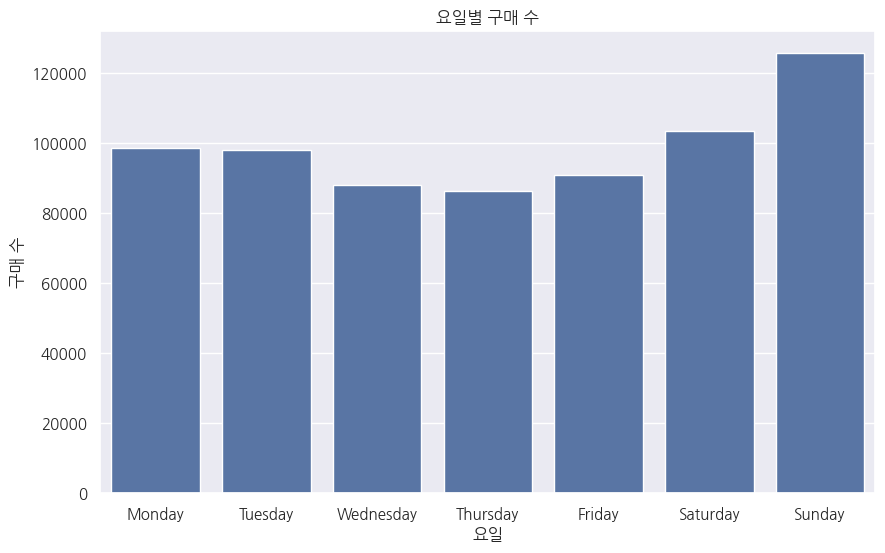

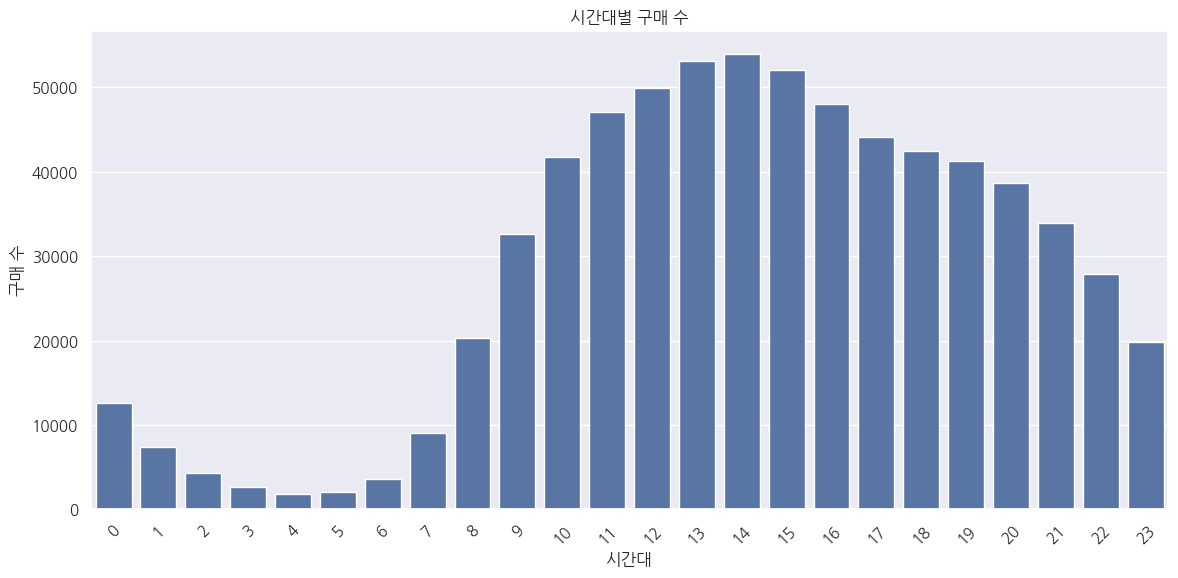

In [ ]:
# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekday_purchase.index, y=weekday_purchase.values, order=weekday_order) # orderÎ•º ÏßÄÏ†ïÌïòÏó¨ Ïõî~Ïùº ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
plt.title('ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.show()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_purchase.index, y=hour_purchase.values)
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.xticks(rotation=45) # ÏãúÍ∞ÑÎåÄ Î†àÏù¥Î∏îÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
plt.tight_layout() # Í∑∏ÎûòÌîÑ Î†àÏù¥ÏïÑÏõÉ ÏûêÎèô Ï°∞Ï†ï
plt.show()

In [ ]:
# Ï∏µÌôî ÏÉòÌîåÎßÅ 750 Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_sampling = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datathon/Ï£ºÎ†•_ÎπÑÏ£ºÎ†•ÏÉÅÌíà Îç∞Ïù¥ÌÑ∞/Ï∏µÌôîÏÉòÌîåÎßÅ/top3_categories_750.csv')

/tmp/ipython-input-3911564163.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sampling = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datathon/Ï£ºÎ†•_ÎπÑÏ£ºÎ†•ÏÉÅÌíà Îç∞Ïù¥ÌÑ∞/Ï∏µÌôîÏÉòÌîåÎßÅ/top3_categories_750.csv')


In [ ]:
# 1Ìöå Íµ¨Îß§ Í≥†Í∞ùÎßå ÌïÑÌÑ∞ÎßÅ
# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ userÎ≥Ñ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
purchase_counts = df_sampling[df_sampling['event_type'] == 'purchase'].groupby('user_id').size()

# Ìïú Î≤àÎßå Íµ¨Îß§Ìïú Í≥†Í∞ù Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
one_time_buyers = purchase_counts[purchase_counts == 1].index

# Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏ÏóêÏÑú Íµ¨Îß§ 1Ìöå Í≥†Í∞ùÎßå ÌïÑÌÑ∞ÎßÅ
one_time_df = df_sampling[df_sampling['user_id'].isin(one_time_buyers)]

In [ ]:
#5-1. ÏöîÏùº/ÏãúÍ∞ÑÎåÄ Î∂ÑÏÑù - one_time_df
# # event_dateÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò
# one_time_df['event_date'] = pd.to_datetime(one_time_df['event_date'])

# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
purchase_one_time_df = one_time_df[one_time_df['event_type'] == 'purchase']

# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò
weekday_purchase = purchase_one_time_df['weekday'].value_counts()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò
hour_purchase = purchase_one_time_df['event_hour'].value_counts().sort_index()

print("ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:\n", weekday_purchase)
print("ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:\n", hour_purchase)

ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:
 weekday
Sunday       19494
Saturday     16823
Monday       16697
Tuesday      16150
Wednesday    15517
Friday       15448
Thursday     14947
Name: count, dtype: int64
ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:
 event_hour
0     2534
1     1604
2     1017
3      674
4      424
5      428
6      634
7     1568
8     3526
9     5455
10    6908
11    7730
12    8234
13    8714
14    8814
15    8317
16    7683
17    7105
18    6829
19    6788
20    6225
21    5381
22    4740
23    3744
Name: count, dtype: int64


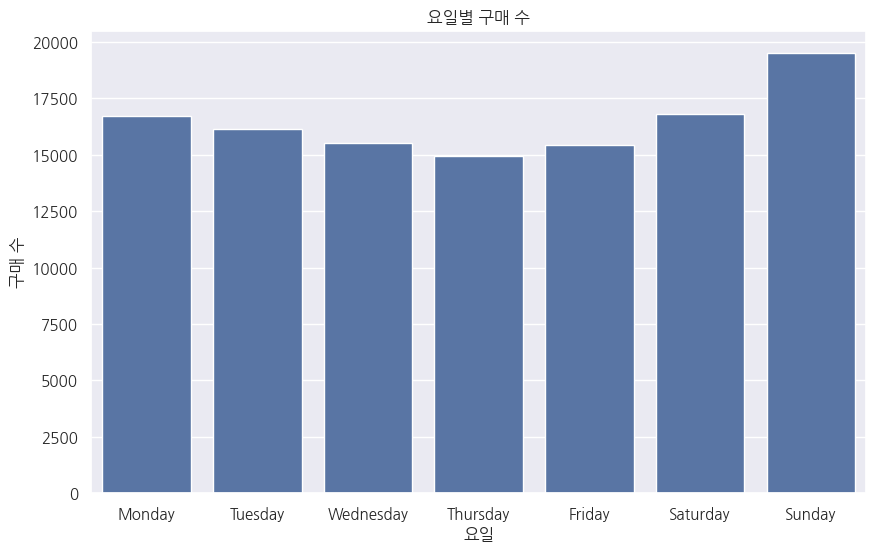

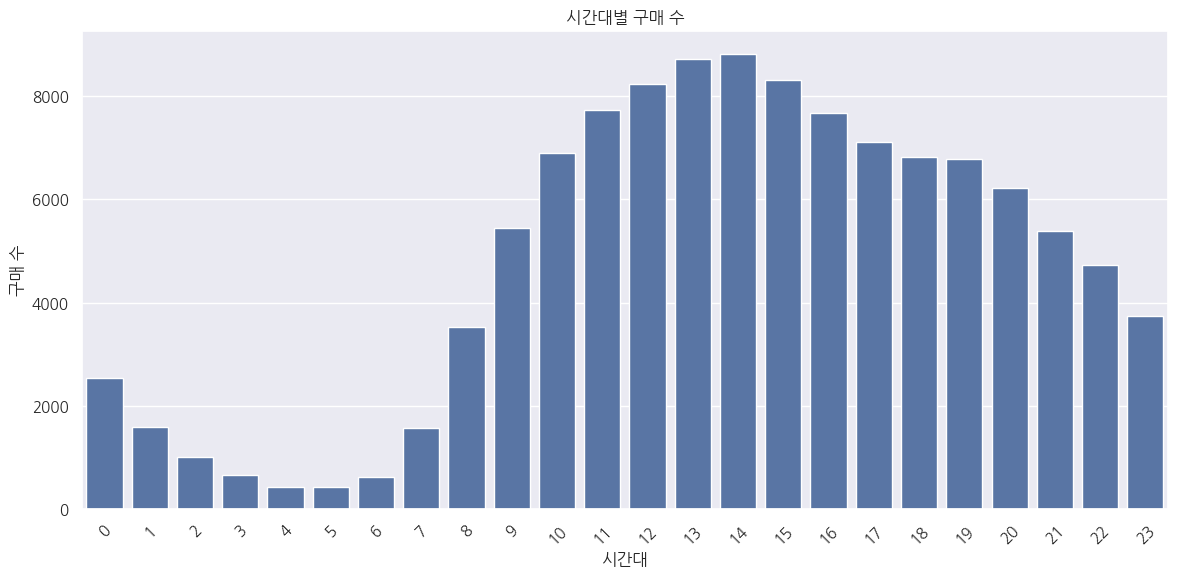

In [ ]:
# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî - one_time_df
plt.figure(figsize=(10, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekday_purchase.index, y=weekday_purchase.values, order=weekday_order) # orderÎ•º ÏßÄÏ†ïÌïòÏó¨ Ïõî~Ïùº ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
plt.title('ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.show()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_purchase.index, y=hour_purchase.values)
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.xticks(rotation=45) # ÏãúÍ∞ÑÎåÄ Î†àÏù¥Î∏îÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
plt.tight_layout() # Í∑∏ÎûòÌîÑ Î†àÏù¥ÏïÑÏõÉ ÏûêÎèô Ï°∞Ï†ï
plt.show()

In [ ]:
# 2Ìöå Ïù¥ÏÉÅ Íµ¨Îß§ Í≥†Í∞ù ÌïÑÌÑ∞ÎßÅ
# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅÌï¥ÏÑú user_idÎ≥Ñ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
purchase_counts = df_sampling[df_sampling['event_type'] == 'purchase'].groupby('user_id').size()

# 2Î≤à Ïù¥ÏÉÅ Íµ¨Îß§Ìïú Í≥†Í∞ù ID Ï∂îÏ∂ú
multi_buyers = purchase_counts[purchase_counts >= 2].index

multi_buyer_df = df_sampling[df_sampling['user_id'].isin(multi_buyers)]

In [ ]:
#5-2. ÏöîÏùº/ÏãúÍ∞ÑÎåÄ Î∂ÑÏÑù - multi_buyer_df
# # event_dateÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò
# multi_buyer_df['event_date'] = pd.to_datetime(multi_buyer_df['event_date'])

# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
purchase_multi_buyer_df = multi_buyer_df[multi_buyer_df['event_type'] == 'purchase']

# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò
weekday_purchase = purchase_multi_buyer_df['weekday'].value_counts()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò
hour_purchase = purchase_multi_buyer_df['event_hour'].value_counts().sort_index()

print("ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:\n", weekday_purchase)
print("ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:\n", hour_purchase)

ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:
 weekday
Monday       7095
Sunday       6868
Tuesday      6576
Wednesday    6493
Saturday     6362
Friday       6304
Thursday     6134
Name: count, dtype: int64
ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:
 event_hour
0     1419
1      964
2      574
3      410
4      270
5      241
6      323
7      697
8     1683
9     2418
10    2864
11    3123
12    3187
13    3416
14    3320
15    3235
16    2886
17    2444
18    2401
19    2259
20    2084
21    1931
22    1869
23    1814
Name: count, dtype: int64


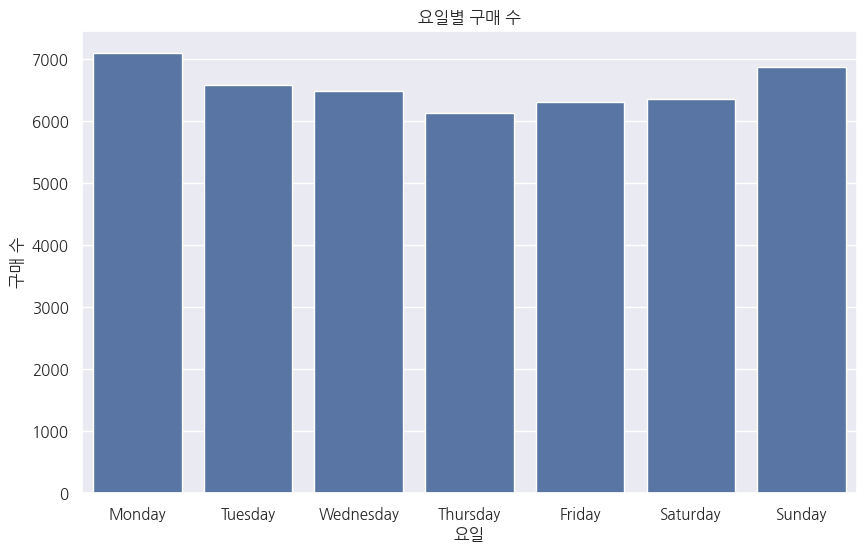

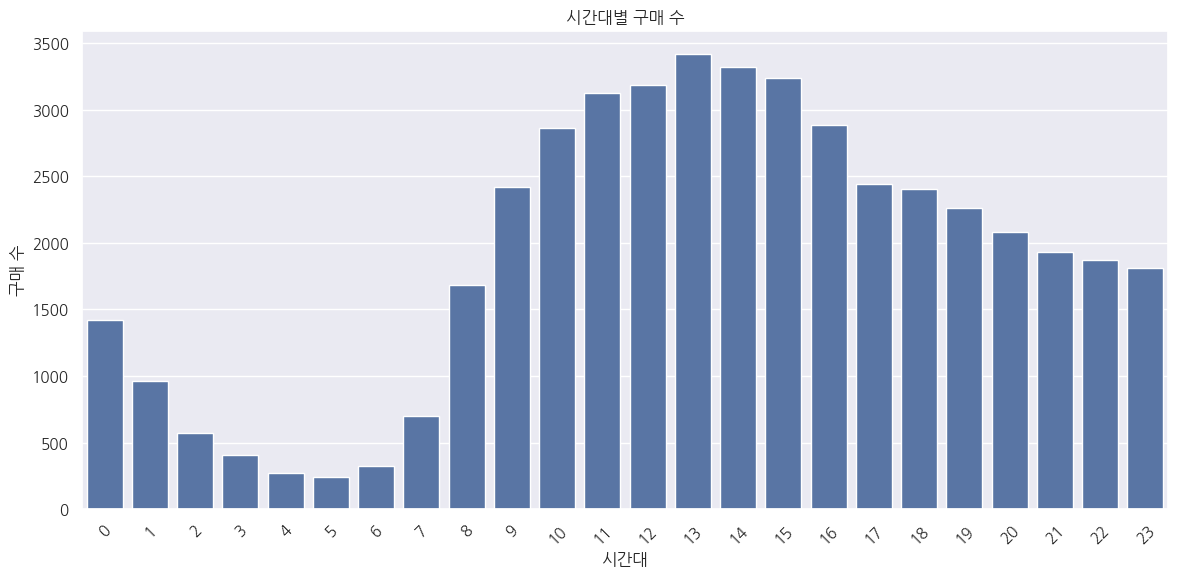

In [ ]:
# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekday_purchase.index, y=weekday_purchase.values, order=weekday_order) # orderÎ•º ÏßÄÏ†ïÌïòÏó¨ Ïõî~Ïùº ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
plt.title('ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.show()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_purchase.index, y=hour_purchase.values)
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.xticks(rotation=45) # ÏãúÍ∞ÑÎåÄ Î†àÏù¥Î∏îÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
plt.tight_layout() # Í∑∏ÎûòÌîÑ Î†àÏù¥ÏïÑÏõÉ ÏûêÎèô Ï°∞Ï†ï
plt.show()

In [ ]:
# to. ÏßÄÏó∞Îãò
########################### ÏΩîÎìúÎäî Ïó¨Í∏∞ÍπåÏßÄ ÏûÖÎãàÎã§!!

In [ ]:
# 1500Îßå Ìñâ Ï∏µÌôî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_sample = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/datathon/Ï£ºÎ†•_ÎπÑÏ£ºÎ†•ÏÉÅÌíà Îç∞Ïù¥ÌÑ∞/Ï∏µÌôîÏÉòÌîåÎßÅ/top3_categories.csv')

/tmp/ipython-input-2970812060.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sample = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/datathon/Ï£ºÎ†•_ÎπÑÏ£ºÎ†•ÏÉÅÌíà Îç∞Ïù¥ÌÑ∞/Ï∏µÌôîÏÉòÌîåÎßÅ/top3_categories.csv')


In [ ]:
# 1Ìöå Íµ¨Îß§ Í≥†Í∞ùÎßå ÌïÑÌÑ∞ÎßÅ
# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅÌïòÏó¨ userÎ≥Ñ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
purchase_counts = df_sample[df_sample['event_type'] == 'purchase'].groupby('user_id').size()

# Ìïú Î≤àÎßå Íµ¨Îß§Ìïú Í≥†Í∞ù Î¶¨Ïä§Ìä∏ Ï∂îÏ∂ú
one_time_buyers = purchase_counts[purchase_counts == 1].index

# Ï†ÑÏ≤¥ Ïù¥Î≤§Ìä∏ÏóêÏÑú Íµ¨Îß§ 1Ìöå Í≥†Í∞ùÎßå ÌïÑÌÑ∞ÎßÅ
one_time_df = df_sample[df_sample['user_id'].isin(one_time_buyers)]

In [ ]:
# ÌçºÎÑê Î∂ÑÏÑù (view-cart-purchase Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®) -> one_time_df
# ÏÇ¨Ïö©ÏûêÎ≥Ñ event_type ÏßëÍ≥Ñ
funnel_counts = one_time_df.groupby('event_type')['user_id'].nunique().reindex(['view', 'cart', 'purchase'])

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ (ÏàúÏ∞®Ï†Å Ï†ÑÌôò Í∏∞Ï§Ä)
view_to_cart = funnel_counts['cart'] / funnel_counts['view'] if funnel_counts['view'] else 0
cart_to_purchase = funnel_counts['purchase'] / funnel_counts['cart'] if funnel_counts['cart'] else 0
view_to_purchase = funnel_counts['purchase'] / funnel_counts['view'] if funnel_counts['view'] else 0

print(funnel_counts)
print(f"view_to_cart: {view_to_cart}")
print(f"cart_to_purchase: {cart_to_purchase}")
print(f"view_to_purchase: {view_to_purchase}")

event_type
view        152290
cart         75183
purchase    193314
Name: user_id, dtype: int64
view_to_cart: 0.49368310460306
cart_to_purchase: 2.5712461593711344
view_to_purchase: 1.269380786657036


In [ ]:
# 2Ìöå Ïù¥ÏÉÅ Íµ¨Îß§ Í≥†Í∞ù ÌïÑÌÑ∞ÎßÅ
# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå ÌïÑÌÑ∞ÎßÅÌï¥ÏÑú user_idÎ≥Ñ Íµ¨Îß§ ÌöüÏàò Í≥ÑÏÇ∞
purchase_counts = df_sample[df_sample['event_type'] == 'purchase'].groupby('user_id').size()

# 2Î≤à Ïù¥ÏÉÅ Íµ¨Îß§Ìïú Í≥†Í∞ù ID Ï∂îÏ∂ú
multi_buyers = purchase_counts[purchase_counts >= 2].index

multi_buyer_df = df_sample[df_sample['user_id'].isin(multi_buyers)]

In [ ]:
# ÌçºÎÑê Î∂ÑÏÑù (view-cart-purchase Îã®Í≥ÑÎ≥Ñ Ïú†Ï†Ä Ïàò Î∞è Ï†ÑÌôòÏú®) -> multi_buyer_df
# ÏÇ¨Ïö©ÏûêÎ≥Ñ event_type ÏßëÍ≥Ñ
funnel_counts = multi_buyer_df.groupby('event_type')['user_id'].nunique().reindex(['view', 'cart', 'purchase'])

# Ï†ÑÌôòÏú® Í≥ÑÏÇ∞ (ÏàúÏ∞®Ï†Å Ï†ÑÌôò Í∏∞Ï§Ä)
view_to_cart = funnel_counts['cart'] / funnel_counts['view'] if funnel_counts['view'] else 0
cart_to_purchase = funnel_counts['purchase'] / funnel_counts['cart'] if funnel_counts['cart'] else 0
view_to_purchase = funnel_counts['purchase'] / funnel_counts['view'] if funnel_counts['view'] else 0

print(funnel_counts)
print(f"view_to_cart: {view_to_cart}")
print(f"cart_to_purchase: {cart_to_purchase}")
print(f"view_to_purchase: {view_to_purchase}")

event_type
view        41061
cart        32150
purchase    43382
Name: user_id, dtype: int64
view_to_cart: 0.7829814178904556
cart_to_purchase: 1.349362363919129
view_to_purchase: 1.0565256569494168


In [ ]:
#5-1. ÏöîÏùº/ÏãúÍ∞ÑÎåÄ Î∂ÑÏÑù - 1500 Ï∏µÌôî ÏÉòÌîåÎßÅ(1ÌöåÎßå)
# # event_dateÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò
# one_time_df['event_date'] = pd.to_datetime(one_time_df['event_date'])

# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
purchase_one_time_df = one_time_df[one_time_df['event_type'] == 'purchase']

# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò
weekday_purchase = purchase_one_time_df['weekday'].value_counts()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò
hour_purchase = purchase_one_time_df['event_hour'].value_counts().sort_index()

print("ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:\n", weekday_purchase)
print("ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:\n", hour_purchase)

ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:
 weekday
Sunday       32958
Monday       28226
Saturday     28217
Tuesday      27165
Friday       25987
Wednesday    25977
Thursday     24784
Name: count, dtype: int64
ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:
 event_hour
0      4071
1      2609
2      1574
3       997
4       677
5       633
6      1042
7      2604
8      5868
9      9203
10    11534
11    12884
12    13736
13    14679
14    14896
15    14082
16    13042
17    12107
18    11611
19    11319
20    10691
21     9278
22     8083
23     6094
Name: count, dtype: int64


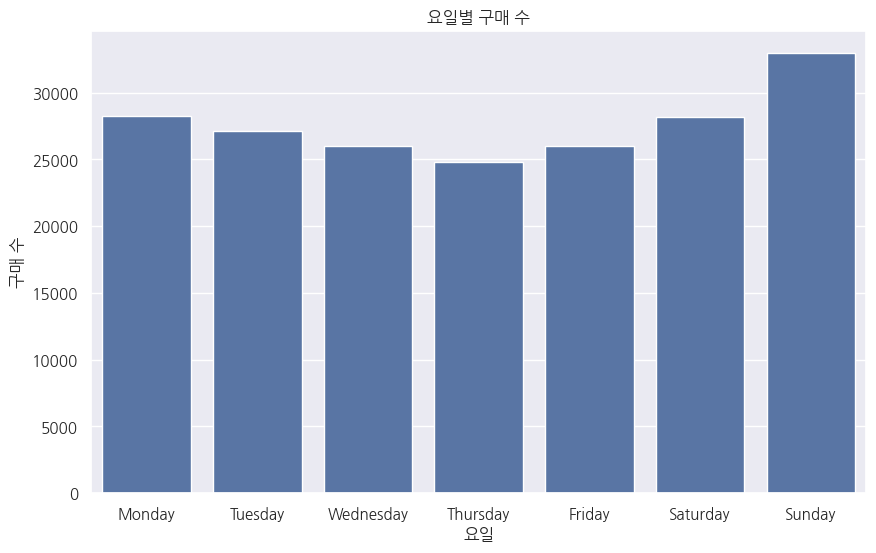

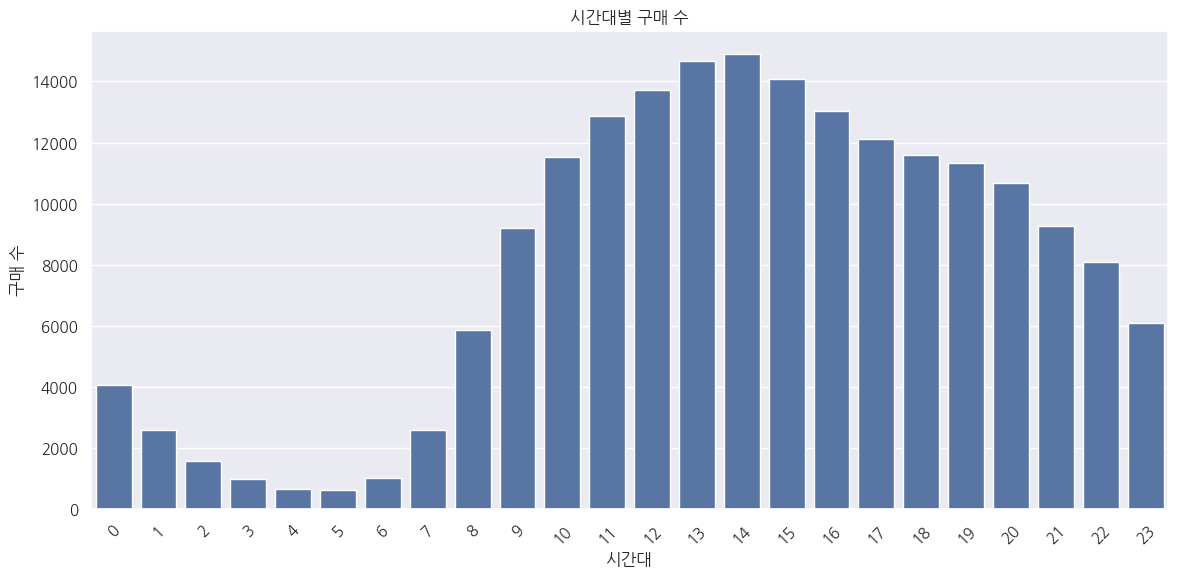

In [ ]:
# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekday_purchase.index, y=weekday_purchase.values, order=weekday_order) # orderÎ•º ÏßÄÏ†ïÌïòÏó¨ Ïõî~Ïùº ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
plt.title('ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.show()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_purchase.index, y=hour_purchase.values)
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.xticks(rotation=45) # ÏãúÍ∞ÑÎåÄ Î†àÏù¥Î∏îÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
plt.tight_layout() # Í∑∏ÎûòÌîÑ Î†àÏù¥ÏïÑÏõÉ ÏûêÎèô Ï°∞Ï†ï
plt.show()

In [ ]:
#5-2. ÏöîÏùº/ÏãúÍ∞ÑÎåÄ Î∂ÑÏÑù - 1500 Ï∏µÌôî ÏÉòÌîåÎßÅ(2Ìöå Ïù¥ÏÉÅ)
# # event_dateÎ•º datetimeÏúºÎ°ú Î≥ÄÌôò
# multi_buyer_df['event_date'] = pd.to_datetime(multi_buyer_df['event_date'])

# Íµ¨Îß§ Ïù¥Î≤§Ìä∏Îßå Ï∂îÏ∂ú
purchase_multi_buyer_df = multi_buyer_df[multi_buyer_df['event_type'] == 'purchase']

# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò
weekday_purchase = purchase_multi_buyer_df['weekday'].value_counts()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò
hour_purchase = purchase_multi_buyer_df['event_hour'].value_counts().sort_index()

print("ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:\n", weekday_purchase)
print("ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:\n", hour_purchase)

ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò:
 weekday
Monday       19568
Sunday       19377
Tuesday      18522
Wednesday    18214
Friday       17640
Saturday     17592
Thursday     17295
Name: count, dtype: int64
ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò:
 event_hour
0     3813
1     2512
2     1603
3     1052
4      711
5      645
6      898
7     1941
8     4534
9     6840
10    7960
11    8672
12    9016
13    9328
14    9357
15    8976
16    8217
17    7136
18    6839
19    6425
20    5977
21    5552
22    5296
23    4908
Name: count, dtype: int64


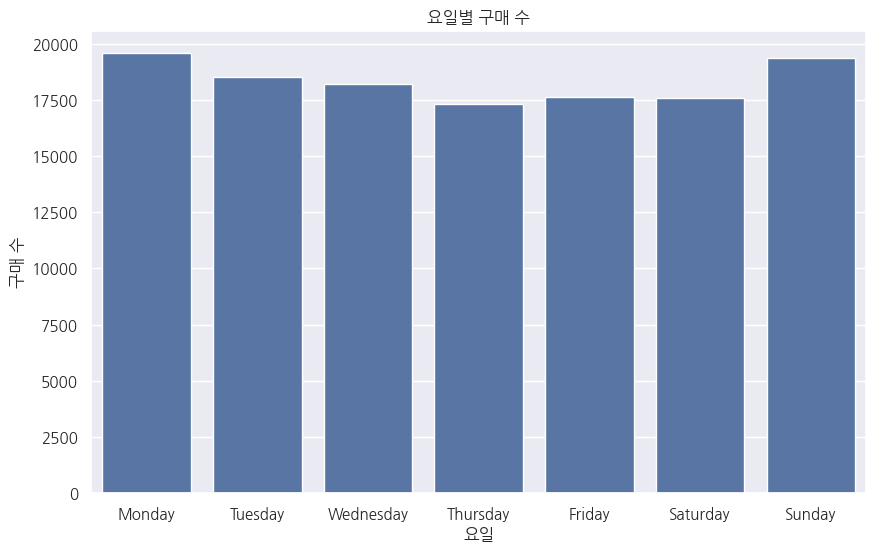

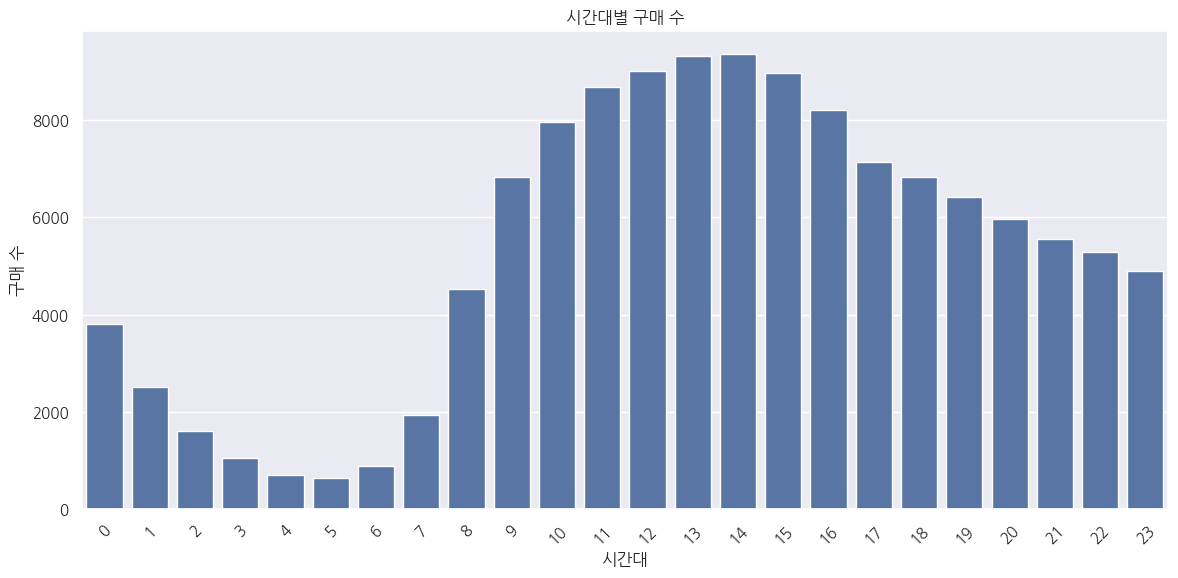

In [ ]:
# ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=weekday_purchase.index, y=weekday_purchase.values, order=weekday_order) # orderÎ•º ÏßÄÏ†ïÌïòÏó¨ Ïõî~Ïùº ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
plt.title('ÏöîÏùºÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏöîÏùº')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.show()

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(x=hour_purchase.index, y=hour_purchase.values)
plt.title('ÏãúÍ∞ÑÎåÄÎ≥Ñ Íµ¨Îß§ Ïàò')
plt.xlabel('ÏãúÍ∞ÑÎåÄ')
plt.ylabel('Íµ¨Îß§ Ïàò')
plt.xticks(rotation=45) # ÏãúÍ∞ÑÎåÄ Î†àÏù¥Î∏îÏù¥ Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
plt.tight_layout() # Í∑∏ÎûòÌîÑ Î†àÏù¥ÏïÑÏõÉ ÏûêÎèô Ï°∞Ï†ï
plt.show()

- Îëê ÏßëÎã® Î™®Îëê view ‚Üí cart ‚Üí purchase Í≤ΩÎ°úÍ∞Ä Ï£ºÏöî ÌùêÎ¶ÑÏù¥Í∏¥ ÌïòÎÇò, Îã§Ìöå Íµ¨Îß§ÏûêÎäî Îçî Í∏∏Í≥† Î∞òÎ≥µÏ†ÅÏù∏ ÌñâÎèô ÌùêÎ¶ÑÏù¥ ÎÇòÌÉÄÎÇ® (ex. view ‚Üí cart ‚Üí Îã§Ïãú view Îì±)

| Ìï≠Î™©               | Îã§Ìöå Íµ¨Îß§Ïûê    | 1Ìöå Íµ¨Îß§Ïûê  | Ï∞®Ïù¥Ï†ê                   |
| ---------------- | --------- | ------- | --------------------- |
| **ÌèâÍ∑† ÏÑ∏ÏÖò Ïàò**      | **15.73** | 8.36    | üîª 7.4Í∞ú ÏÑ∏ÏÖò Ï†ÅÏùå (ÏïΩ 53%) |
| **ÌèâÍ∑† Ïù¥Î≤§Ìä∏ Ïàò**     | **83.51** | 41.11   | üîª Ï†àÎ∞ò ÏàòÏ§Ä              |
| **ÌèâÍ∑† ÌÉêÏÉâ Ïπ¥ÌÖåÍ≥†Î¶¨ Ïàò** | **2.20**  | 1.86    | üîª ÏïΩ 15% Í∞êÏÜå           |
| **ÌèâÍ∑† Î∏åÎûúÎìú Ïàò**     | **8.47**  | 5.74    | üîª ÏïΩ 32% Í∞êÏÜå           |
| **ÌèâÍ∑† Íµ¨Îß§ Í∞ÑÍ≤©(Ïùº)**  | **7.87Ïùº** | (Ìï¥Îãπ ÏóÜÏùå) | -                     |

!! Ïù∏ÏÇ¨Ïù¥Ìä∏ ÎèÑÏ∂ú: Ïû¨Íµ¨Îß§ÏûêÏôÄÏùò Ï∞®Ïù¥Ï†ê

A. ÌÉêÏÉâ ÍπäÏù¥ Î∂ÄÏ°±
- 1Ìöå Íµ¨Îß§ÏûêÎäî ÏÑ∏ÏÖò ÏàòÏôÄ Ïù¥Î≤§Ìä∏ ÏàòÍ∞Ä Ï†àÎ∞ò Ïù¥ÌïòÎ°ú, ÏßßÏùÄ ÏãúÍ∞Ñ ÏïàÏóê Í≤∞Ï†ïÏùÑ ÎÇ¥Î¶¨Í≥† Ïù¥ÌÉàÌïú Í≤ΩÌñ•Ïù¥ ÌÅº

- Î∏åÎûúÎìú/Ïπ¥ÌÖåÍ≥†Î¶¨ Îã§ÏñëÏÑ±ÎèÑ ÎÇÆÏïÑ, Ï∂©ÏÑ±ÎèÑÎÇò ÎåÄÏïà ÎπÑÍµêÎ≥¥Îã§Îäî Îã®Î∞úÏÑ± ÏÜåÎπÑ ÏÑ±Ìñ•

B. Î∞òÎ≥µ Î∞©Î¨∏ Î∂ÄÏ°±
- Îã§Ìöå Íµ¨Îß§ÏûêÎäî ÌèâÍ∑† 15Í∞ú Ïù¥ÏÉÅ ÏÑ∏ÏÖòÏùÑ Í∞ÄÏßÑ Î∞òÎ©¥, 1Ìöå Íµ¨Îß§ÏûêÎäî 8Í∞ú -> Ïû¨Î∞©Î¨∏ÏùÑ Ïú†ÎèÑÌï† Ïàò ÏûàÎäî Î¶¨ÎßàÏù∏ÎìúÍ∞Ä Î∂ÄÏ°±ÌñàÏùÑ Í∞ÄÎä•ÏÑ±

C. ÎßàÏºÄÌåÖ ÌÉÄÏù¥Î∞ç Ïù∏Ïãù Î∂ÄÏ°±
- Îã§Ìöå Íµ¨Îß§ÏûêÏùò ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∞ÑÍ≤©ÏùÄ ÏïΩ 8Ïùº -> Ïù¥ ÌÉÄÏù¥Î∞çÏóê ÎßûÏ∂∞ Î¶¨ÎßàÏù∏Îìú Ï∫†ÌéòÏù∏ÏùÑ ÌñàÎçîÎùºÎ©¥ Ïû¨Íµ¨Îß§Î°ú Ïù¥Ïñ¥Ï°åÏùÑ ÏàòÎèÑ

!! Ï†ÑÎûµ Ï†úÏïà: 1Ìöå Íµ¨Îß§Ïûê Î¶¨ÌÖêÏÖò Ïú†ÎèÑ

| Ï†ÑÎûµ                   | Íµ¨Ï≤¥Ï†Å Î∞©Ïïà                                         |
| -------------------- | ---------------------------------------------- |
| **‚ë† Î¶¨ÎßàÏù∏Îìú ÎßàÏºÄÌåÖ Í∞ïÌôî**    | Ï≤´ Íµ¨Îß§ ÌõÑ **7\~8Ïùº Ïù¥ÎÇ¥** ÌÉÄÍ≤üÌåÖ Î©îÏãúÏßÄ Î∞úÏÜ° (Ìï†Ïù∏, Ïã†ÏÉÅÌíà ÏïàÎÇ¥ Îì±)  |
| **‚ë° Ïπ¥ÌÖåÍ≥†Î¶¨ ÌôïÏû• Ïú†ÎèÑ**     | Îã§Î•∏ Ïù∏Í∏∞ Ïπ¥ÌÖåÍ≥†Î¶¨ **AI Ï∂îÏ≤ú** ÎòêÎäî **‚ÄúÏù¥ ÏÉÅÌíàÏùÑ Î≥∏ ÏÇ¨ÎûåÏùÄ\~‚Äù** Î∞∞ÎÑà |
| **‚ë¢ Î∏åÎûúÎìú Îã§ÏñëÏÑ± ÏûêÍ∑π**     | ÎèôÏùº ÏÉÅÌíà ÎÇ¥ **Î∏åÎûúÎìú ÎπÑÍµê Ïú†ÎèÑÌòï UI** ÎòêÎäî ‚ÄúÏú†ÏÇ¨ Î∏åÎûúÎìú Ï∂îÏ≤ú‚Äù Ï†úÍ≥µ    |
| **‚ë£ Ïû¨Íµ¨Îß§ Ïú†Ïù∏ ÌòúÌÉù**      | Ï≤´ Íµ¨Îß§ Í≥†Í∞ù ÌïúÏ†ï **Îã§Ïùå Íµ¨Îß§ Ïø†Ìè∞ Ï†úÍ≥µ**                     |
| **‚ë§ ÌñâÎèô Í∏∞Î∞ò ÏÑ∏Í∑∏Î®ºÌä∏ ÌÉÄÍ≤üÌåÖ** | cartÍπåÏßÄ Í∞îÎã§Í∞Ä Íµ¨Îß§ÌïòÏßÄ ÏïäÏùÄ Ïú†Ï†Ä ‚Üí **Ìë∏Ïãú ÏïåÎ¶º or Ïû¨ÏûÖÍ≥† ÏïàÎÇ¥ Î©îÏùº** |

#2. Î¶¨ÌÖêÏÖò Ìå®ÌÑ¥ ÌÉêÏÉâ (Ïù¥ÌÉà vs Ïû¨Íµ¨Îß§)

Î™©Ï†Å: Ïû¨Íµ¨Îß§Ìïú Í≥†Í∞ùÍ≥º Ïù¥ÌÉàÌïú Í≥†Í∞ùÏùò ÌñâÎèô Ï∞®Ïù¥ ÎèÑÏ∂ú

Î¶¨ÌÖêÏÖò Í∏∞Ï§Ä:
'ÎìúÎ¨∏' Í≥†Í∞ùÏùò ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞Î•º Í∏∞Ï§ÄÏúºÎ°ú cutoff ÏÑ§Ï†ï ‚Üí cutoff Ïù¥Ï†ÑÏóê 2Ìöå Ïù¥ÏÉÅ Íµ¨Îß§Ìïú Í≥†Í∞ùÏùÄ Î¶¨ÌÖêÏÖò, ÏïÑÎãàÎùºÎ©¥ Ïù¥ÌÉà

- Î¶¨ÌÖêÏÖò Í∑∏Î£π vs Ïù¥ÌÉà Í∑∏Î£πÏùò ÌñâÎèô Ìå®ÌÑ¥ ÎπÑÍµê:

Ï≤´ Î∞©Î¨∏ Ïù¥ÌõÑ Íµ¨Îß§ÍπåÏßÄ ÌèâÍ∑† ÏãúÍ∞Ñ

Î∑∞/Ïπ¥Ìä∏ ÌöüÏàò, ÏÑ∏ÏÖò Ïàò, Ï≤¥Î•ò ÏãúÍ∞Ñ, Ï£ºÎßê/ÌèâÏùº Ïù¥Ïö© Ìå®ÌÑ¥

Ï£ºÎ†• vs ÎπÑÏ£ºÎ†• ÏÉÅÌíàÍµ∞ ÍµêÏ∞® ÏÇ¨Ïö© Ïó¨Î∂Ä (Ï£ºÎ†•Îßå Íµ¨Îß§ vs ÎπÑÏ£ºÎ†• Ï†ÑÌôò Ïó¨Î∂Ä)

#3. ÌñâÎèô Í∏∞Î∞ò Ïû¨Íµ¨Îß§ Ïú†ÎèÑ ÏöîÏù∏ Î∂ÑÏÑù
Î™©Ï†Å:
Ïû¨Íµ¨Îß§ ÌôïÎ•†ÏùÑ ÎÜíÏù¥Îäî ÌñâÎèô Ìå®ÌÑ¥ ÎèÑÏ∂ú

- Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä / Í≤∞Ï†ïÌä∏Î¶¨ Í∏∞Î∞ò feature importance

Ïòà: (ÏµúÍ∑º ÏÑ∏ÏÖò Ïàò, cart Ïù¥Î≤§Ìä∏ ÎπÑÏú®, Î∞©Î¨∏ ÏãúÍ∞ÑÎåÄ Îì± ‚Üí Ïû¨Íµ¨Îß§ Ïó¨Î∂Ä)

- ÌñâÎèô ÏãúÌÄÄÏä§ Ìå®ÌÑ¥ Î∂ÑÏÑù (event sequence mining)

Ïòà: ‚Äúview ‚Üí cart ‚Üí Îã§Ïãú view‚Äù Í∞ôÏùÄ Î∞òÎ≥µ ÌñâÎèôÏù¥ ÎßéÏùÄ Í≤ΩÏö∞ Ïû¨Íµ¨Îß§ ÌôïÎ•† ÎÜíÏùå